In [1]:
import torch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X = np.arange(0, 1, 0.02)
print(X[:3])
y = 0.66778 * X + 0.98761
print(y[:3])
print(len(X), len(y))

[0.   0.02 0.04]
[0.98761   1.0009656 1.0143212]
50 50


In [5]:
X

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [6]:
y

array([0.98761  , 1.0009656, 1.0143212, 1.0276768, 1.0410324, 1.054388 ,
       1.0677436, 1.0810992, 1.0944548, 1.1078104, 1.121166 , 1.1345216,
       1.1478772, 1.1612328, 1.1745884, 1.187944 , 1.2012996, 1.2146552,
       1.2280108, 1.2413664, 1.254722 , 1.2680776, 1.2814332, 1.2947888,
       1.3081444, 1.3215   , 1.3348556, 1.3482112, 1.3615668, 1.3749224,
       1.388278 , 1.4016336, 1.4149892, 1.4283448, 1.4417004, 1.455056 ,
       1.4684116, 1.4817672, 1.4951228, 1.5084784, 1.521834 , 1.5351896,
       1.5485452, 1.5619008, 1.5752564, 1.588612 , 1.6019676, 1.6153232,
       1.6286788, 1.6420344])

In [7]:
split = int(len(X) * 0.8)
Xtrain, ytrain = X[:split], y[:split]
xtest, ytest = X[split:], y[split:]
print("legth of the xtrain ", len(Xtrain), "length of ytrain: ", len(ytrain))
print("legth of the xtest ", len(xtest), "length of ytest: ", len(ytest))

legth of the xtrain  40 length of ytrain:  40
legth of the xtest  10 length of ytest:  10


In [8]:
Xtrain

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78])

In [9]:
xtest

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [10]:
split

40

In [11]:
def plot_data(Xtrain=Xtrain, ytrain=ytrain, ytest=ytest, xtest=xtest, predictions=None):
    plt.scatter(Xtrain, ytrain, c="b", label="Training Data")
    plt.scatter(xtest, ytest, c="g", label="Testing data")
    if predictions is not None:
        plt.plot(xtest, predictions, c="r", label="predicted data")
    plt.title("X vs Y")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

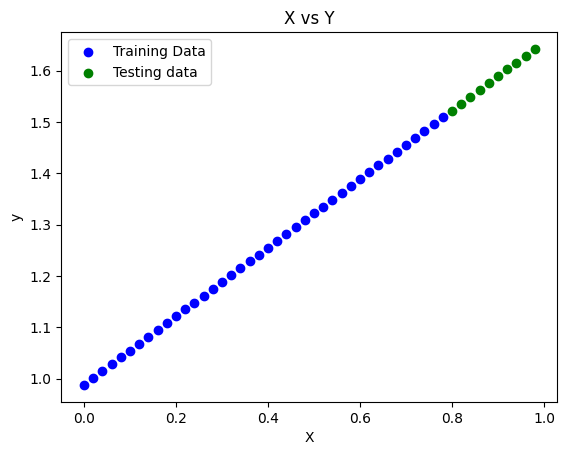

In [12]:
plot_data()

In [13]:
torch.backends.mps.is_available()

True

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(device)

mps


In [25]:
type(Xtrain)

numpy.ndarray

In [24]:
Xtrain

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78])

In [ ]:
# convert to tensor

xtrain_tensor = torch.tensor(Xtrain)
ytrain_tensor = torch.tensor(ytrain)
xtest_tensor, ytest_tensor = torch.tensor(xtest), torch.tensor(ytest)

In [ ]:
type(xtrain_tensor), type(xtrain_tensor)

(torch.Tensor, torch.Tensor)

In [26]:
xtest_tensor

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800], dtype=torch.float64)

In [28]:
xtest

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [30]:
from torch import nn


class LinearRegressionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [32]:
torch.manual_seed(42)


model_1=LinearRegressionNetwork()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_75683/2899232376.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return self.weights * x + self.bias


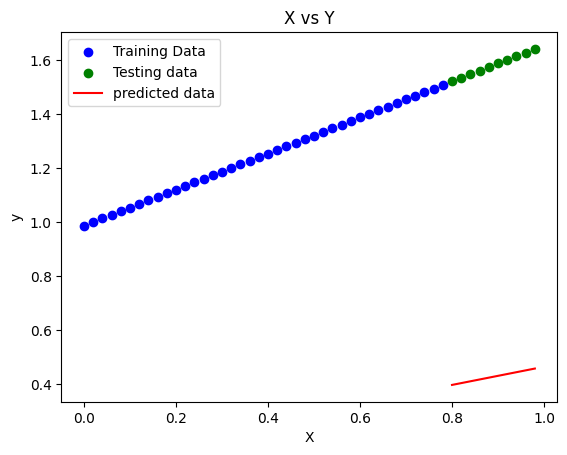

In [33]:
with torch.inference_mode():
    ypred=model_1(xtest)
plot_data(predictions=ypred)

In [34]:
# loss fn
lossfn=nn.MSELoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
ephocs=100
train_loss_list=[]
test_loss_list=[]
for ephoc in range(ephocs):
    model_1.train()
    train_pred=model_1(Xtrain)
    loss=lossfn(ytrain,train_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing?
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(xtest)
        
    

